In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [2]:
# Function to plot a gallery of images
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [3]:
# Directory containing the images
dir_name = r'C:\Users\chait\OneDrive\Desktop\data\dataset\faces'
h, w = 300, 300  # Height and width of the images

In [4]:
# Initialize lists for the dataset
X = []
y = []
class_names = []
person_id = 0

# Load and process images
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    
    if os.path.isdir(dir_path):
        class_names.append(person_name)
        for image_name in os.listdir(dir_path):
            image_path = os.path.join(dir_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Failed to load {image_path}")
                continue
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_image = cv2.resize(gray, (h, w))
            v = resized_image.flatten()
            X.append(v)
            y.append(person_id)
        person_id += 1

In [5]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)


In [6]:
# Verify the dataset
print(f"Number of images in X: {len(X)}")
print(f"Number of labels in y: {len(y)}")
print(f"Number of class names: {len(class_names)}")

Number of images in X: 450
Number of labels in y: 450
Number of class names: 9


In [7]:
# Ensure that class_names is correctly populated
if len(class_names) == 0:
    raise ValueError("No class names were found. Please check your dataset directory structure.")

In [8]:
# Check for consistency
if len(y) == 0 or len(X) == 0:
    raise ValueError("No data loaded. Please check your dataset and the directory structure.")

In [9]:
# Split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
# Apply PCA for dimensionality reduction
n_components = 150
print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))


Extracting the top 150 eigenfaces from 337 faces


In [11]:
# Project the input data onto the PCA basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [12]:

# Apply LDA for further dimensionality reduction
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

In [13]:
# Train a Multi-layer Perceptron classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)


Iteration 1, loss = 2.98868983
Iteration 2, loss = 2.93349486
Iteration 3, loss = 2.88427889
Iteration 4, loss = 2.83342379
Iteration 5, loss = 2.78294773
Iteration 6, loss = 2.73638147
Iteration 7, loss = 2.68767678
Iteration 8, loss = 2.64215798
Iteration 9, loss = 2.59835209
Iteration 10, loss = 2.55494531
Iteration 11, loss = 2.51261018
Iteration 12, loss = 2.47366808
Iteration 13, loss = 2.43410343
Iteration 14, loss = 2.39752869
Iteration 15, loss = 2.36014984
Iteration 16, loss = 2.32468144
Iteration 17, loss = 2.29109217
Iteration 18, loss = 2.25595403
Iteration 19, loss = 2.22553396
Iteration 20, loss = 2.19271049
Iteration 21, loss = 2.16342297
Iteration 22, loss = 2.13243241
Iteration 23, loss = 2.10334986
Iteration 24, loss = 2.07424483
Iteration 25, loss = 2.04619632
Iteration 26, loss = 2.01965764
Iteration 27, loss = 1.99132340
Iteration 28, loss = 1.96460776
Iteration 29, loss = 1.93805820
Iteration 30, loss = 1.91170195
Iteration 31, loss = 1.88602178
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=1,
              verbose=True)

In [14]:
# Predict the labels of the test set
y_pred = []
y_prob = []

for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)

In [15]:
# Evaluate and display results
true_positive = 0
prediction_titles = []

for i in range(len(y_pred)):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = f'pred: {pred_name}, pr: {str(y_prob[i])[:3]} \ntrue: {true_name}'
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

accuracy = true_positive * 100 / len(y_pred)
print(f"Accuracy: {accuracy}%")

Accuracy: 69.02654867256638%


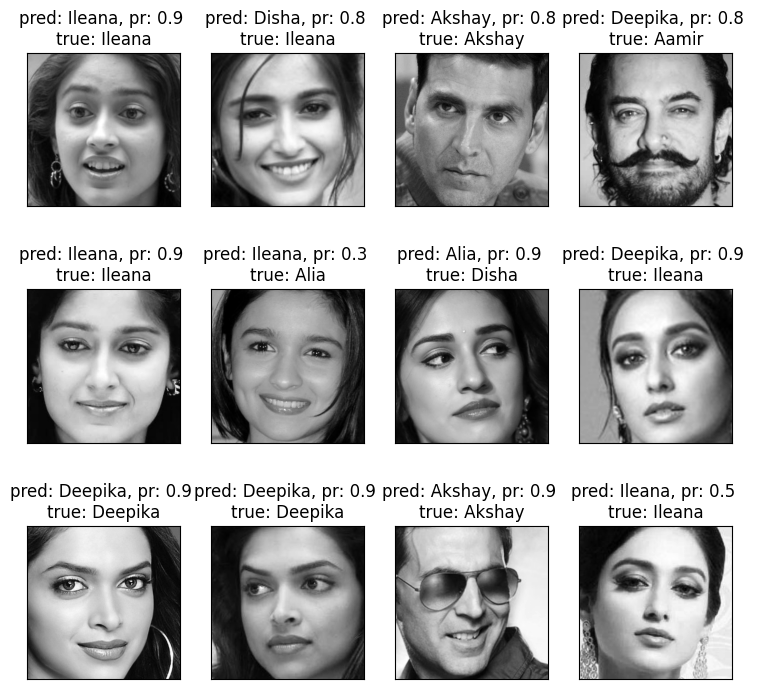

In [16]:

# Plot the results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
